/tmp/ipykernel_2575/252894582.py:24: RuntimeWarning: overflow encountered in scalar multiply
  psi[i] = (2.0 * psi[i-1] * (1.0 - (5.0/12.0) * h**2 * k2[i-1]) -
/tmp/ipykernel_2575/252894582.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  psi[i] = (2.0 * psi[i-1] * (1.0 - (5.0/12.0) * h**2 * k2[i-1]) -
/tmp/ipykernel_2575/252894582.py:54: RuntimeWarning: overflow encountered in square
  psi /= np.sqrt(np.trapz(psi**2, x))


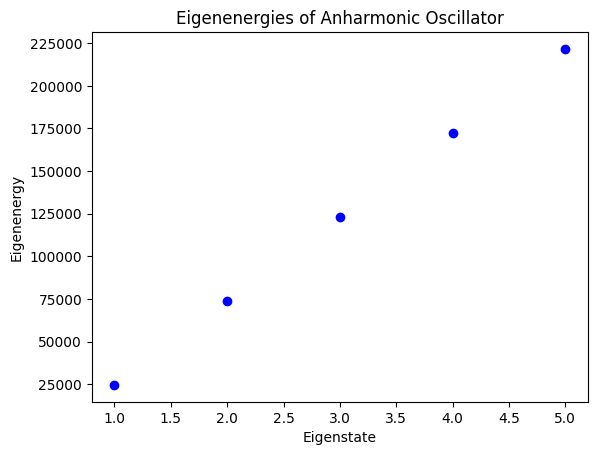

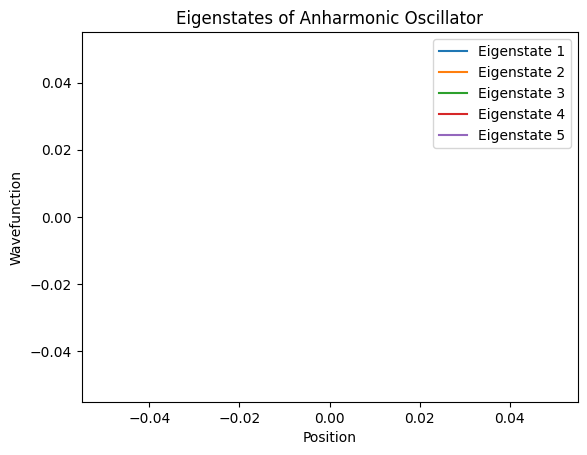

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
C = 1.0
D = 1.0
E = 1.0

# Potential function
def V_anharmonic(x):
    return 0.5*(C*x**2 - D*x**3 + E*x**4)

# Numerov method
def numerov_method(x, psi, E):
    h = x[1] - x[0]
    k2 = 2.0 * (E - V_anharmonic(x))  # Second derivative term

    # Initialize wavefunction
    psi[0] = 0.0
    psi[1] = 1e-10

    # Numerov iteration
    for i in range(2, len(x)):
        psi[i] = (2.0 * psi[i-1] * (1.0 - (5.0/12.0) * h**2 * k2[i-1]) -
                  psi[i-2] * (1.0 + (1.0/12.0) * h**2 * k2[i-2])) / (1.0 + (1.0/12.0) * h**2 * k2[i])

    return psi

# Discretization parameters
x_min = -5.0
x_max = 5.0
N = 1000
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Number of eigenstates to compute
num_eigenstates = 5

# Compute eigenenergies and eigenstates
eigenenergies = []
eigenstates = []

for n in range(num_eigenstates):
    # Initial guess for eigenenergy
    E = (n + 0.5) * np.pi**2 / (2.0 * dx**2)

    # Initialize wavefunction
    psi = np.zeros(N)

    # Solve Schrödinger equation using Numerov method
    psi = numerov_method(x, psi, E)

    # Normalize wavefunction
    psi /= np.sqrt(np.trapz(psi**2, x))

    # Store eigenenergy and eigenstate
    eigenenergies.append(E)
    eigenstates.append(psi)

# Plot eigenenergies
plt.figure()
plt.plot(range(1, num_eigenstates+1), eigenenergies, 'bo')
plt.xlabel('Eigenstate')
plt.ylabel('Eigenenergy')
plt.title('Eigenenergies of Anharmonic Oscillator')
plt.show()

# Plot eigenstates
plt.figure()
for n in range(num_eigenstates):
    plt.plot(x, eigenstates[n], label=f'Eigenstate {n+1}')
plt.xlabel('Position')
plt.ylabel('Wavefunction')
plt.title('Eigenstates of Anharmonic Oscillator')
plt.legend()
plt.show()
